# Lab One: Visualization and Data Preprocessing
### Laura Ahumada, Kevin Boyd, Shikha Pandey, Duy Nguyen
##### Southern Methodist University
##### Fall, 2022

# Business Understanding

+ What factors influence a person's income? Our first project for the Machine Learning course in the DataScience@SMU program was to perform an Explanatory Data Analysis with a data set of our choosing, which we chose an Adult Census Income data set. This data set was extracted from the U.S Census Bureau by Bary Becker in 1994 and is widely used on the Kaggle website. We used this data to better understand the factors that influence a person having an income of either more or less than $50,000 annually.

+ Some of the specific relations that we looked at are the statistical significances between sex versus income, and race versus income. We performed a *chi-squared test* and used it's p-value to assess and confirm the mentioned above. Another aspect that we looked at, is despite how a person can't change their gender, race and age, we should be able to see what specific education level and other achievable factors, with their specific race, age or sex, could help a person to get an income of more than $50k annually. A *two-way ANOVA* was conducted to validate that and check for statistical significance. A *PCA* was also conducted to reduce dimensions and visualize the data.

+ Given the results of these hypotheses, they can help us find the societal gaps the government should address while also giving us an idea of the important factors that can influence a person's income.

In [4]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express


In [5]:
# Get current directory
os.path.dirname(os.path.realpath('__file__'))

'/Users/lauraahumada/Desktop/MachineLearning_1stProject-main'

In [6]:
# Import file
df=pd.read_csv("adult.csv")

In [7]:
# Checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Data Understanding

## Data types
# Meaning and Type of Data
+ The original data consists of 32,561 entries/rows and 14 attributes/columns, with the response variable being "income".


| Attribute | Description | Type | Values | 
| --- | --- | --- | --- |
| age | The age of this person. | *Continuos, Ratio* | `17 - 90` 
| workclass | The employment status of this person. | *Discret, Nominal* | `Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked`
| fnlwgt | The final weight of how many people this person represents. | *Continuous, Ratio* | `12,285 - 1,484,705` 
| education | The highest level of education this person has achieved. | *Discrete, Ordinal* | `Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool` 
| education.num | Numerical form of the highest level of education this person achieved. | *Discrete, Ordinal* | `1 - 16` 
| marital.status | The marital status of this person. `Married-civ-spouse` corresponds to civilian spouse. `Married-AF-spouse` corresponds to an Armed Forces spouse. | *Discrete, Nominal* | `Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse` 
| occupation | The general type of occupation of this person. | *Discrete, Nominal* | `Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces` 
| relationship | The relation that this person identifies as in their immediate family. | *Discrete, Nominal* | `Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried` 
| race | The race of this person. | *Discrete, Nominal* | `White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black` 
| sex | The biological sex of this person. | *Discrete, Nominal* | `Female, Male` 
| capital.gain | Capital gains of this person. | *Continuous, Ratio* | `0 - 99,999` 
| capital.loss | Capital loss of this person. | *Continuous, Ratio* | `0 - 4,356` 
| hours.per.week | The number of hours this person reports to work per week.| *Continuous, Ratio* | `1 - 99` 
| native.country | The country of origin of this person. | *Discrete, Nominal* | `United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands` 
| income | The logistic classification of this person based on their income. | *Discrete, Ordinal* | `<=50k, >50k` 


In [8]:
df.shape

(32561, 15)

In [9]:
#Looking at the data
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Data Quality

### Missing Values
+ We do see missing values in workclass, occupation and native.country entered as "?". 

+ Despite the "?" values taking around 5% of their respective columns "workclass", "occupation", "native.country", they were not removed due to the following reason. Census data is collected by census-takers knocking on doors and will either ask or let citizens volunteeringly write down the answer of questions about their workclass, occupation and native country, and the people may not want to report those 3 things to the government. However their incomes were still reported so it's best to treat those missing values as another category and replace them with "Unknown".

	|Column	|MissingValues|
   | --- | --- | 
	|workclass	|1836|
	|occupation	|1843|
	|native.country|	583|
    


In [11]:
# missing values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [12]:
# Verify missing values for categorical variables 
# FOR-LOOP
# Other than the question marks (?), this for-loop counts incorrect values based on the 
# assumption that they have less than 2 characters
# Returns a list of characters that are found
# Otherwise, return []

counter=[]
vals=[]
for i in df.select_dtypes(object).columns:
    vals.append(str(((df[df[i].str.len()<2])[i]).unique()))
    counter.append((df[df[i].str.len()<2].count())[i])
    
# creating df and filtering    
d = {'Column': df.select_dtypes(object).columns, 'MissingValues': counter}
missing=pd.DataFrame(data=d)
print(set(vals))
missing[missing["MissingValues"]!=0]


{"['?']", '[]'}


,Column,MissingValues
0,workclass,1836
3,occupation,1843
7,native.country,583


In [13]:
# Replacing question marks (?) with "Unknown"
df[['workclass','occupation','native.country']] = df[['workclass','occupation','native.country']].replace({'?':'Unknown'})


In [14]:
# Verifying that there are no "?"
counter=[]
vals=[]
for i in df.select_dtypes(object).columns:
    vals.append(str(((df[df[i].str.len()<2])[i]).unique()))
    counter.append((df[df[i].str.len()<2].count())[i])
    
# creating df and filtering    
d = {'Column': df.select_dtypes(object).columns, 'MissingValues': counter}
missing=pd.DataFrame(data=d)
print(set(vals))
missing[missing["MissingValues"]!=0]

{'[]'}


,Column,MissingValues


### Duplicates
+ We do find that there are 24 duplicate records but we will keep those entries because it makes sense that there could be a small number of people with same entries considering the categories we are given and the fact that this is census data with over 30,000 entries. 


In [15]:
#duplicates
df[df.duplicated()].count()

age               24
workclass         24
fnlwgt            24
education         24
education.num     24
marital.status    24
occupation        24
relationship      24
race              24
sex               24
capital.gain      24
capital.loss      24
hours.per.week    24
native.country    24
income            24
dtype: int64

### Outliers

+ Checking Capital gain and loss, we can see median is 0 and mean is 1077 showing just outliers. We will discuss this and how we dealt with it later on.

+ All of the values that would be considered outliers in each category are plausible and do not look like misreported data. Therefore, we will not remove any data. 

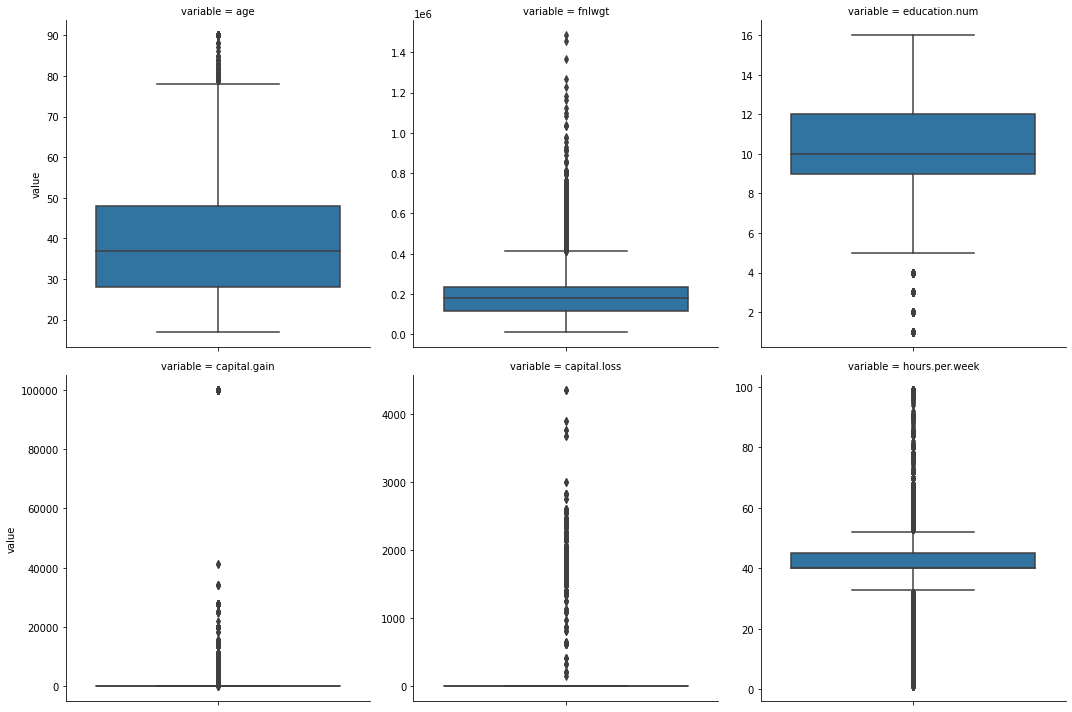

In [16]:
numdf = df._get_numeric_data()

sns.catplot(y='value', col='variable', sharey=False, col_wrap=3, 
            data=numdf.melt(), kind='box')
plt.show()

 ##  New Variables / Features

Based on the factors we have, we saw that we could segmnent age and hours worked into categories that we can use to visualize and further analyze. We also see that capital gain and capital loss have the same distribution and can be combined into a single variable as net_capital.

+ Classifying age set as "age_class"  \
    containing "Young"(0,25), "Middle-aged(26,45)", "Senior"(46-65), "Old"(66+)
+ Classifying hours worked set as "work_type" \
    containing "PartTime"(0,25), "Full_time"(25,40), "OverTime"(41-60), "Workaholic"(60+)
+ Creating net_capital as variable, subtracting the capital gain and capital loss data\
    mean is 990, min is -4356, max is 99,999 and median is still 0


In [17]:
# New variables, these will also help us with graphs 
df["age_class"] =pd.cut(df["age"], bins=[15, 25, 45, 65, 100],labels = ["Young", "Middle-aged", "Senior", "Old"])
df["work_type"] =pd.cut(df["hours.per.week"], bins=[0,25,40,60,168],labels = ["PartTime", "Full_time", "OverTime", "Workaholic"])


# Capital gain mostly have all 0 and one huge outlier 99999 
df["net_capital"]=df["capital.gain"]-df["capital.loss"]



In [18]:
# making sure the new attributes are objects to match the rest 
# later we will modify to category
for i in df.select_dtypes(include=['category']).columns:
    df[i]= df[i].astype("object")
    

In [19]:
#df=df.drop(columns=["education"])
#drop variables now that information is saved in net_capital
df=df.drop(columns=["capital.loss","capital.gain"])


## Statistics

| Continuous Variable | Range | Mean | Median | Mode | Variance |
| --- | --- | --- | --- | --- | --- |
| age | (17,90) | 38.581647 | 37 | 36 | 186.061
| fnlwgt | (1228.5,1484705) | 189778 | 178356 | 164190 & 203488 | 1.114E10
| education.num | (1,16) | 10.081 | 10 | 9 | 6.619
| capital.gain | (0,99999) | 1077.649 | 0 | 0 | 5.454E7
| capital.loss | (0,4356) | 87.304 | 0 | 0 | 1.624E5
| hours.per.week | (1,99) | 40.437 | 40 | 40 | 152.459

The summary statistics for continuous variables are described below: 
+ This points out again how Net capital median 0 while the mean is 990 which shows how skewed this variable is.
+ We can see that age has a more normal distribution, with a mean of 38 years.
+ Hours per week also has a normal distribution with mean of 40 hours and median of 40 hours.
+ For education.num we can see that it also has normal distribution with a mean of 10 and median of 10.
+ the fnlwgt also seems to have somewhat normal distribution with a mean and median around 180,000	

***Significance***
+ These statistics are important because they tell us about the distribution of the data. It can help us point out outliers, incorrect data, and the range of the continuous variables. This could also help us check assumption of normality for any downstream analysis


In [20]:
df.describe()

,age,fnlwgt,education.num,hours.per.week,net_capital
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,40.437456,990.345014
std,13.640433,1.055500e+05,2.572720,12.347429,7408.986951
min,17.000000,1.228500e+04,1.000000,1.000000,-4356.000000
25%,28.000000,1.178270e+05,9.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99.000000,99999.000000


+ Checking variance

In [21]:
df.var(numeric_only=True)

age               1.860614e+02
fnlwgt            1.114080e+10
education.num     6.618890e+00
hours.per.week    1.524590e+02
net_capital       5.489309e+07
dtype: float64

# Distribution of continuous data 
+ Age is a little right skewed 
+ Hours per week seem somewhat normally distributed
+ Net capital is very right skewed, mostly points around 0 

age


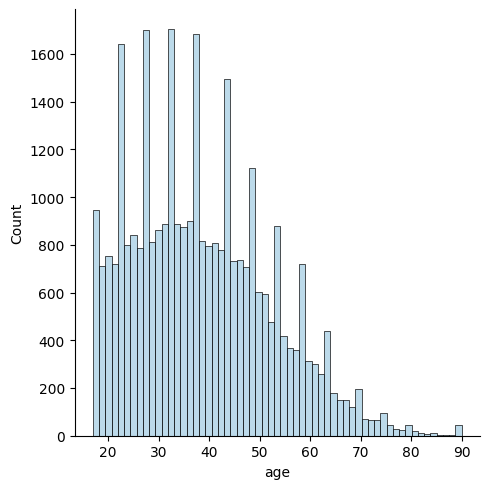

fnlwgt


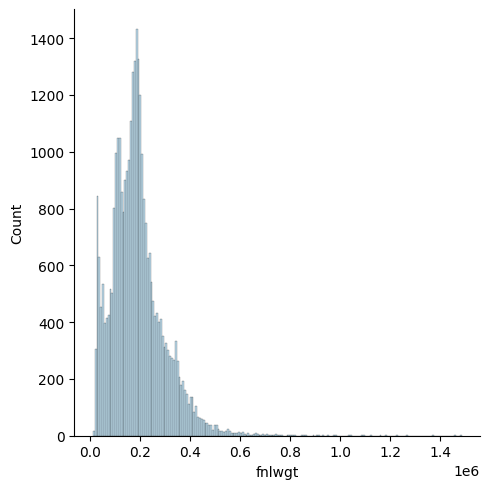

education.num


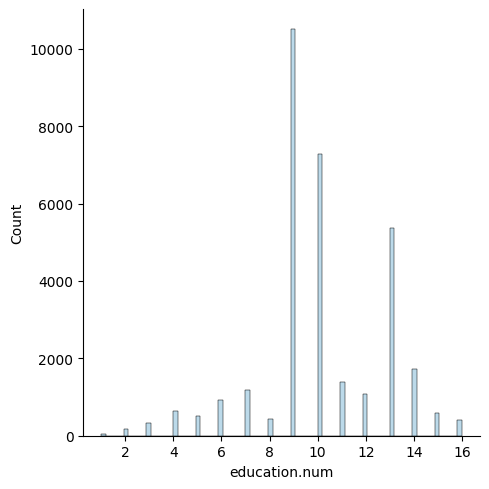

hours.per.week


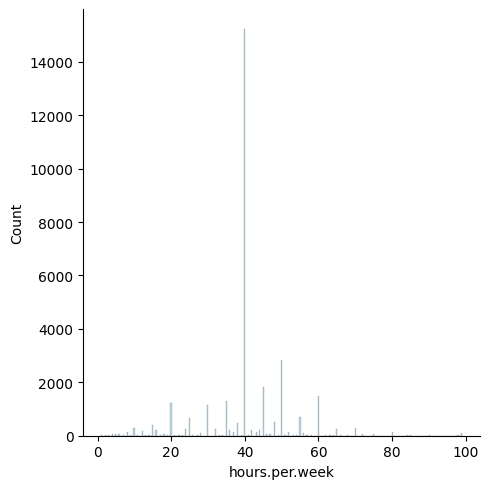

net_capital


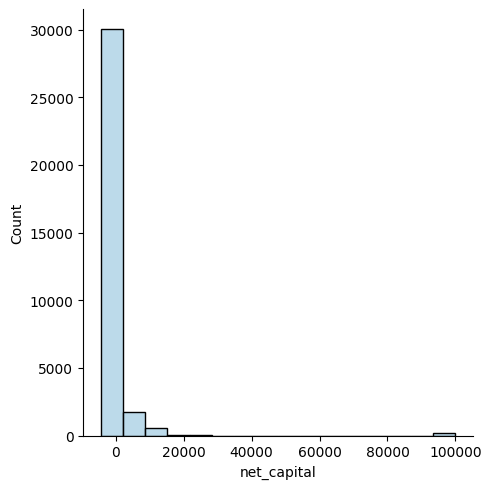

In [22]:
# for future plots
# Creating df of only Categorical variables 
cat_df=df.select_dtypes(include=['object'])

# Creating df of only Continuous variables
num_df = df._get_numeric_data()
sns.set_palette("Paired")
for i in list(num_df):
    print('\033[1m' + i) 
    sns.displot(df[i], kde=False)
    plt.show()

# Distribution of categorical data


The distribution of each of the factors seems to make sense. Below are some of the things we noticed:
+ Most people work in private companies
+ Most are married-civ-spouse followed by never married
+ Majority are white 
+ There are 6 times more husbands than wife and husbands is the largest group 
+ Above can be explained by total females being half of the total males 
+ Majority of the people are from US 
+ Most people make less than 50K. 76% of the individuals make less than 50K and only 24% make more than 50K 
+ Most people are middle aged
+ Most are full time 
+ More than half have at least graduated highschoool or higher education

In [23]:
print('Under 50K : ' + f"{round(len(df[df.income=='<=50K'])/len(df)*100.0)}", "%")
print('Over 50K : ' + f"{round(len(df[df.income=='>50K'])/len(df)*100.0)}","%")

Under 50K : 76 %
Over 50K : 24 %


[Text(0.5, 1.0, 'Income Distribution')]

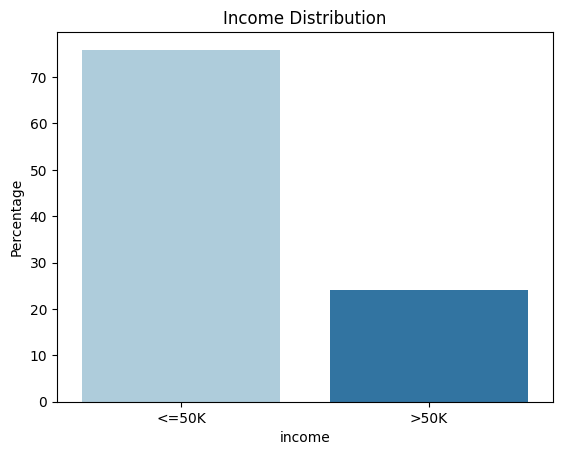

In [24]:
sns.set_palette("Paired")
income_perc = df['income'].value_counts(normalize = True).mul(100).round(1).rename_axis('income').reset_index(name = 'Percentage')
sns.barplot(x = 'income', y = 'Percentage', data = income_perc).set(title='Income Distribution')


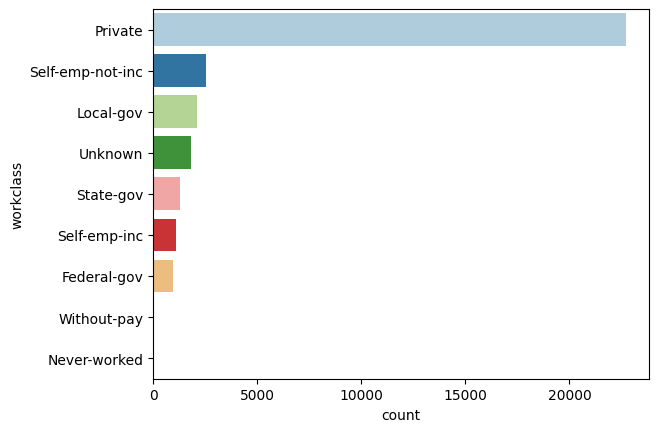

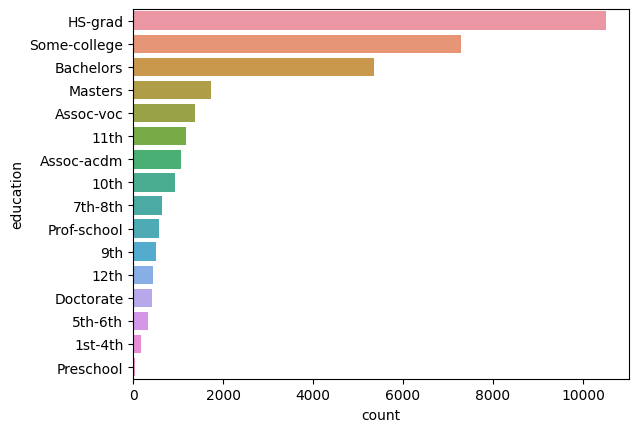

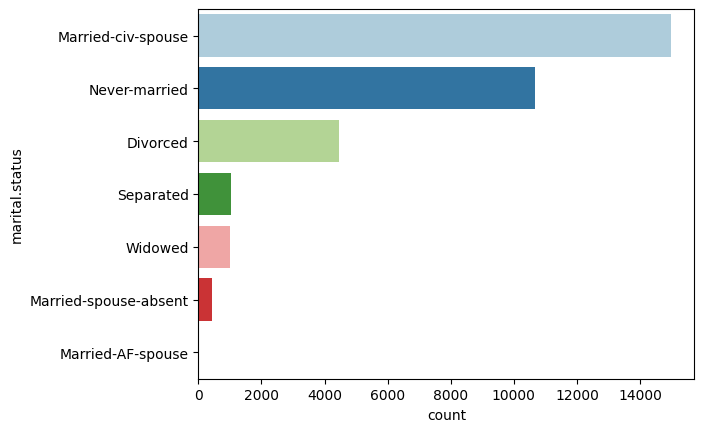

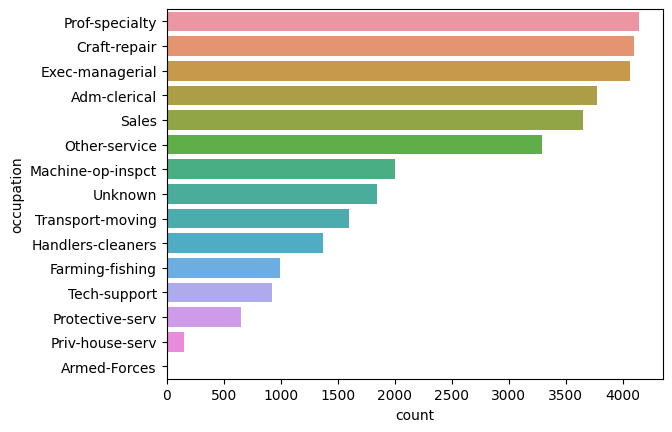

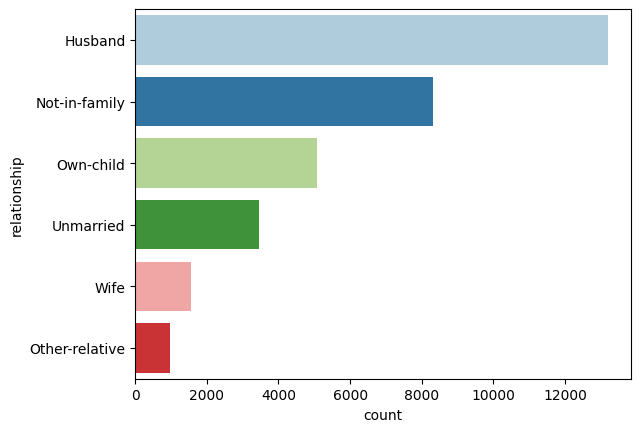

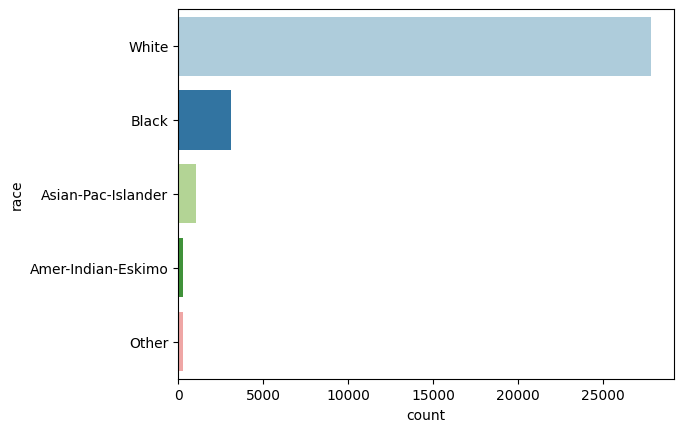

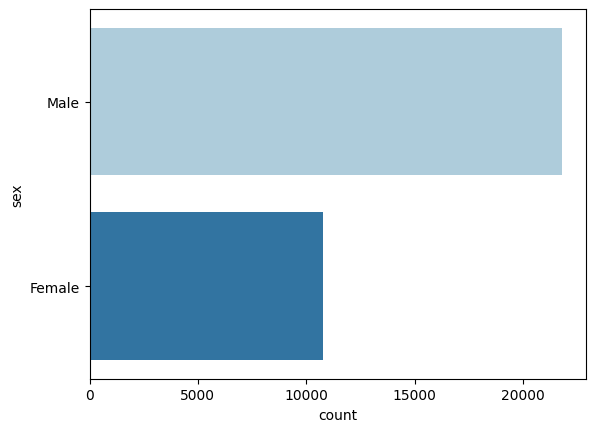

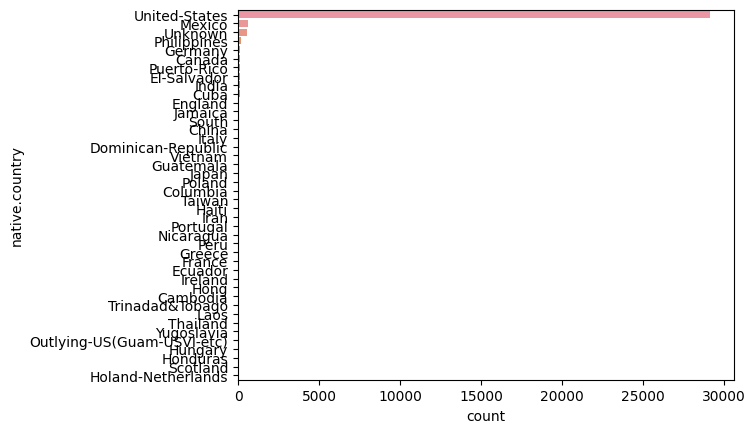

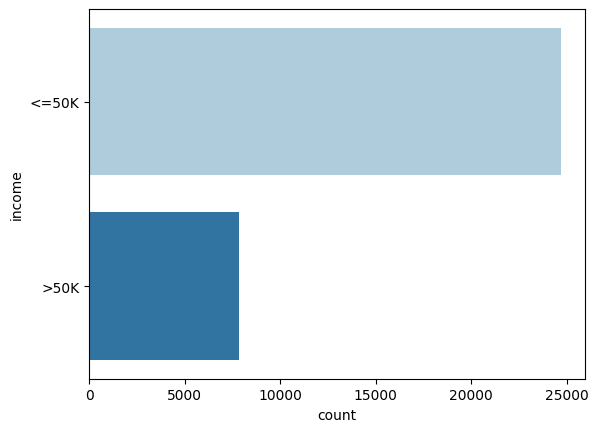

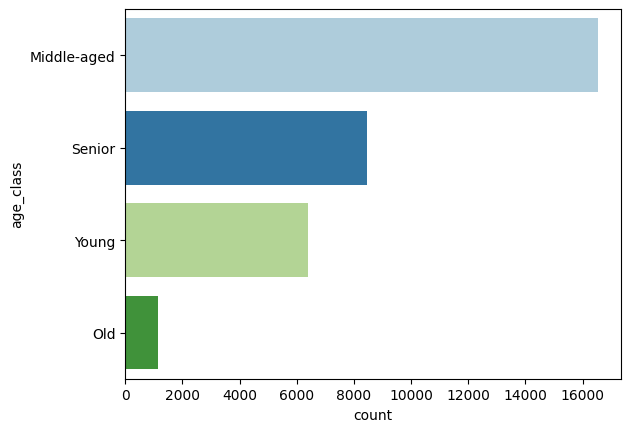

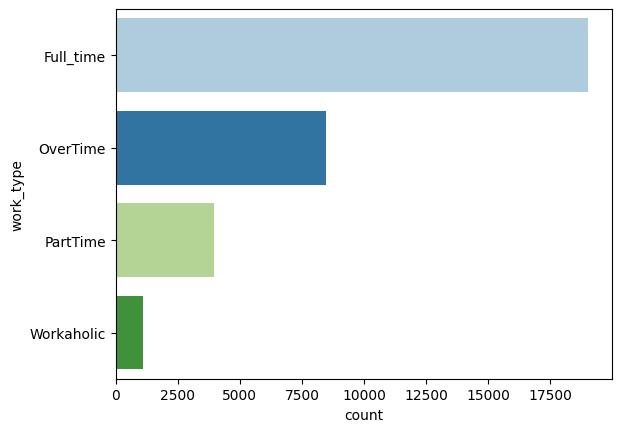

<Figure size 640x480 with 0 Axes>

In [25]:
sns.set_palette("Paired")
# Checking the distribution for each factor
for i in cat_df.columns:
    sns.countplot( y= i, data = df, orient= 'h',
    order=df[i].value_counts().index)
    plt.figure()


### Looking closer at the categorical distribution

+ 69.7% work in private companies.
+ 32.25% are highschool grads, 22.39% have some college education, and 16.44% have a Bachelor's degree. Only 5.29% have a Master's degree.
+ 46% of people entered in the data are married to a civillian, and 32.8% have never married.
+ The 3 occupation categories of professional specialty, craft repair, and executive managerial each represent 12% of all occupations.
+ 40.52% of people entered in the data are husbands, while only 4% are wives. This tells us that the husband is usually the one opening the door when US Census knocks on their door.
+ 85.43% of people are white.
+ 66.92% of people are males. This was contradicting the husbands versus wives distribution, so we digged deeper.
+ It seems like there are mistakes entered into the data but they are very minimal.
+ Almost 90% of people are native to the U.S., while 10% are from another country.
+ About a quarter of our population makes over $50,000.

In [26]:
df['workclass'].value_counts(normalize=True)[0:1] * 100

Private    69.703019
Name: workclass, dtype: float64

In [27]:
df['education'].value_counts(normalize=True)[0:4] * 100

HS-grad         32.250238
Some-college    22.391818
Bachelors       16.446055
Masters          5.291607
Name: education, dtype: float64

In [28]:
df['marital.status'].value_counts(normalize=True)[0:2] * 100

Married-civ-spouse    45.993673
Never-married         32.809189
Name: marital.status, dtype: float64

In [29]:
df['occupation'].value_counts(normalize=True)[0:3] * 100

Prof-specialty     12.714597
Craft-repair       12.588680
Exec-managerial    12.487331
Name: occupation, dtype: float64

In [30]:
df['relationship'].value_counts(normalize=True)[0:1] * 100

Husband    40.517797
Name: relationship, dtype: float64

In [31]:
df['race'].value_counts(normalize=True)[0:1] * 100

White    85.427352
Name: race, dtype: float64

In [32]:
df['sex'].value_counts(normalize=True) * 100

Male      66.920549
Female    33.079451
Name: sex, dtype: float64

In [33]:
df.loc[df['relationship'] == 'Husband', ['sex']].value_counts().sort_index()

sex   
Female        1
Male      13192
dtype: int64

In [34]:
df.loc[df['relationship'] == 'Wife', ['sex']].value_counts().sort_index()

sex   
Female    1566
Male         2
dtype: int64

In [35]:
df['native.country'].value_counts(normalize=True)[0:1] * 100

United-States    89.585701
Name: native.country, dtype: float64

In [36]:
df['income'].value_counts(normalize=True) * 100

<=50K    75.919044
>50K     24.080956
Name: income, dtype: float64

# Exploring Relationships 

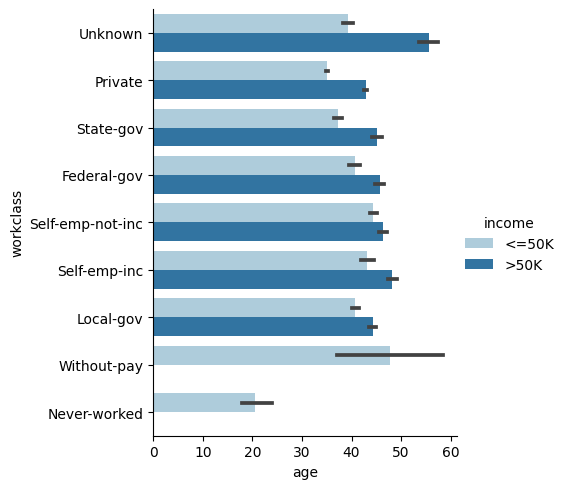

In [37]:
sns.set_palette("Paired")
sns.catplot(x="age", y="workclass", hue="income", kind="bar", data=df)

#### Workclass and Age related to Income
+ A trend we see is that in all categories people that make over 50K are generally older. 
+ We see that never worked are all under 30 years old and make under 50k. 
+ The age range for witout pay is higher than never worked and they also make under 50k which is obvious. 

[Text(0.5, 1.0, 'Income distribution by gender')]

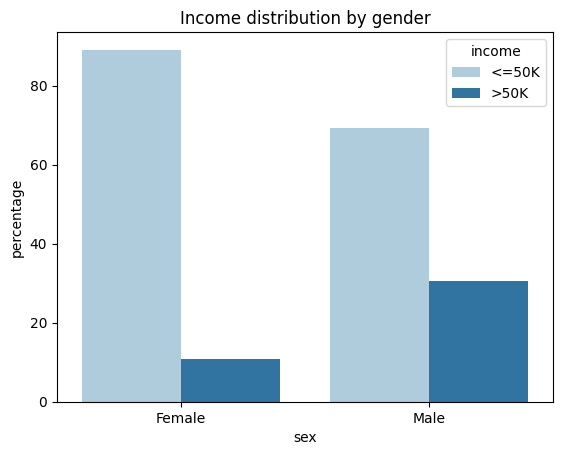

In [38]:
sns.set_palette("Paired")
x, y, hue = "sex", "percentage", "income"
(df[hue]
 .groupby(df[x])
 .value_counts(normalize=True)
 .mul(100).round(1)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue).set(title='Income distribution by gender'))

 ***We see that there is a large gap between male and female data therefore we will look at the distribution filtering for each to see if anything is different***

##### Income as the target
+ Marital.status does seem to have a difference on female and male making more than 50k.
+ For both male and female Married-AF-Spouse and Married-civ-spouse have the very similar percent for obtaining more or less than 50k.
+ However in the rest, there is large gap having female with the lowest percentage of making more than 50k.

In [39]:
a=pd.crosstab([df["marital.status"],df["sex"]],df["income"],
           normalize='index')

sorted_df = pd.DataFrame(a.sort_values(by = ['>50K'], ascending = [False]))
sorted_df

income                           <=50K      >50K
marital.status        sex                       
Married-civ-spouse    Female  0.544961  0.455039
                      Male    0.554171  0.445829
Married-AF-spouse     Male    0.555556  0.444444
                      Female  0.571429  0.428571
Widowed               Male    0.767857  0.232143
Divorced              Male    0.839639  0.160361
Separated             Male    0.875635  0.124365
Married-spouse-absent Male    0.892019  0.107981
Divorced              Female  0.933009  0.066991
Widowed               Female  0.944242  0.055758
Never-married         Male    0.945064  0.054936
Married-spouse-absent Female  0.946341  0.053659
Never-married         Female  0.965177  0.034823
Separated             Female  0.973059  0.026941


### Just male distribution of all variables and just female distribution of all variables to see diferences

#### Similar
+ For working 78% females works on private companies while 71% of man work on private
+ ***For excecutivte managerial 11% for female while 13% for men.***
+ Sales is another occupation that is similar 11% male while 12% female
+ From all females 89% are from US and from all males 89% are males
+ Out of females 54% are middle age  and for males the same
+ For highschoool grad in their category they make up about the same 32% vs 31%
+ Males and females do have about the same % of bachelors - 17% male and 15% female 
+ Out of females 5% have Masters and its the same for males
+ *** Male and Female have similar percentages in each of the categories of Education, even though the total count for males is greater in this data set*** 
 
#### Big differences
+ 61% males are married with spouse while only 15% females are married
+ More women have never been married 44% vs only 26% of men have never been married 
+ Only 8% men are divorced while 25% women are divorsed 
+ 20% of females own child while only 12% males own child even though their marriage % is higher 
+ 88% of males are white and 80% of females are white 
+ Out of males 31% make more than 50k while out of females only 11% make more than 50k 
+ Out of females 65% work fulltime compared to males 55% work full time, however out of males 32% do overtime while out of females they only do 15% 


***Only Marital.status, relationship and education results are different when filtering by gender***

***By percent***

In [40]:
for i in cat_df.columns:
    print(i.upper())
    print("--------MALE--------")
    print(df[df["sex"]=="Male"][i].value_counts(normalize=True).mul(100).round(1))
    print("--------FEMALE--------")
    print(df[df["sex"]=="Female"][i].value_counts(normalize=True).mul(100).round(1))
    print()

WORKCLASS
--------MALE--------
Private             68.6
Self-emp-not-inc     9.8
Local-gov            5.8
Unknown              4.6
Self-emp-inc         4.5
State-gov            3.7
Federal-gov          3.0
Without-pay          0.0
Never-worked         0.0
Name: workclass, dtype: float64
--------FEMALE--------
Private             72.0
Unknown              7.8
Local-gov            7.8
State-gov            4.5
Self-emp-not-inc     3.7
Federal-gov          2.9
Self-emp-inc         1.3
Without-pay          0.0
Never-worked         0.0
Name: workclass, dtype: float64

EDUCATION
--------MALE--------
HS-grad         32.6
Some-college    20.6
Bachelors       17.1
Masters          5.4
Assoc-voc        4.0
11th             3.4
Assoc-acdm       3.0
10th             2.9
7th-8th          2.2
Prof-school      2.2
9th              1.7
Doctorate        1.5
12th             1.3
5th-6th          1.1
1st-4th          0.6
Preschool        0.2
Name: education, dtype: float64
--------FEMALE--------
HS-grad  

### Males and Females tend to work around the same amount of hours with a median of 40 hours per week

In [41]:
# A quick glance at the hours per week of work between male and female
#there are a lot more males in the data so graphs show than females work less but lets look at actual numbers
for i in ["Male", "Female"]:
    print("--Hours a week--")
    print("Mean for",i, df[df["sex"]==i]["hours.per.week"].mean())
    print("Median for",i, df[df["sex"]==i]["hours.per.week"].median())
    print("")


--Hours a week--
Mean for Male 42.42808627810923
Median for Male 40.0

--Hours a week--
Mean for Female 36.410361154953115
Median for Female 40.0



### The distribution of Hours per week by age class filtered by sex or income is almost the same. The only difference is for the young age class who are greater than 50K

<AxesSubplot:xlabel='age_class', ylabel='hours.per.week'>

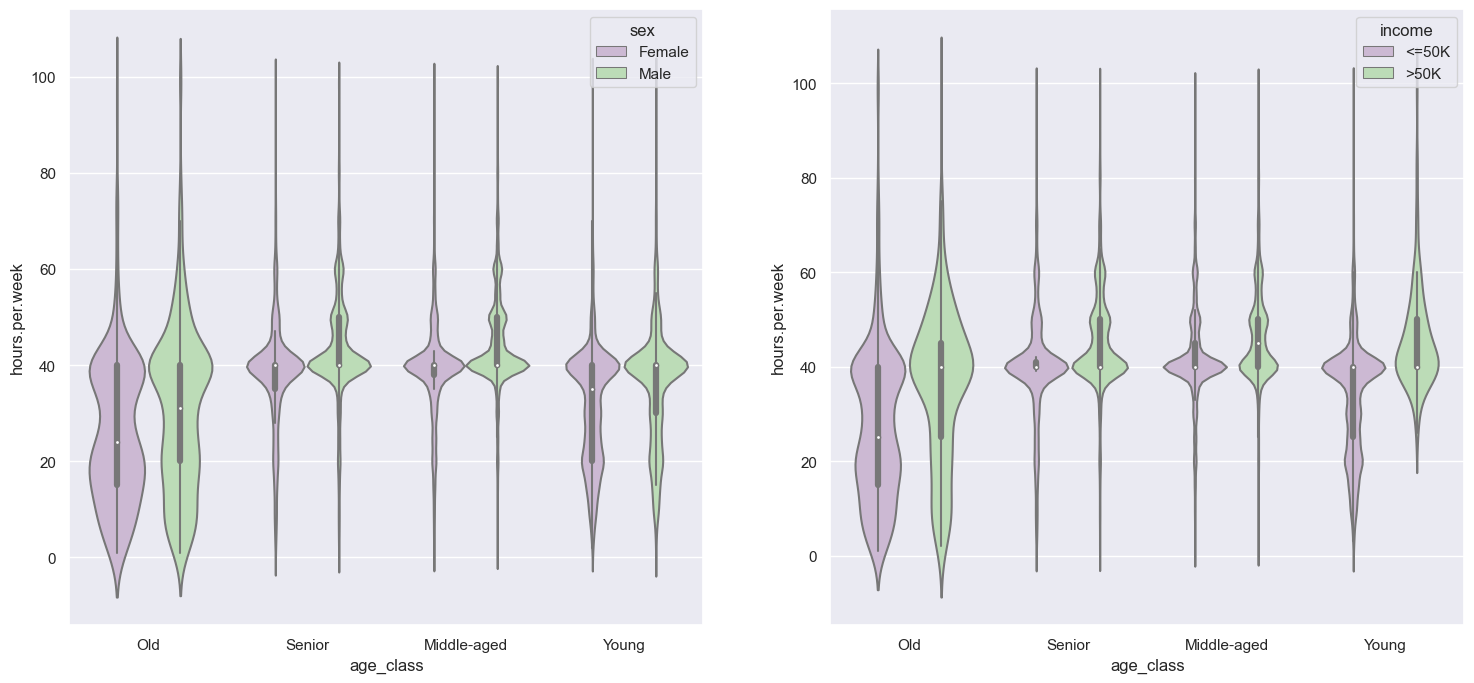

In [42]:
sns.set()
fig, axes = plt.subplots(1, 2,figsize=(18, 8))

sns.violinplot(ax=axes[0], data=df,x='age_class',y='hours.per.week',hue='sex', 
               kind='violin',ci=95,palette='PRGn',
               height=7)

sns.violinplot(ax=axes[1],x='age_class',y='hours.per.week',hue='income',data=df, 
               kind='violin',ci=95,palette='PRGn',
               height=7)

### We can see that people that did not graduate from highschool have lower chances for making greater than 50K regardless of sex

[Text(0.5, 1.0, 'Female')]

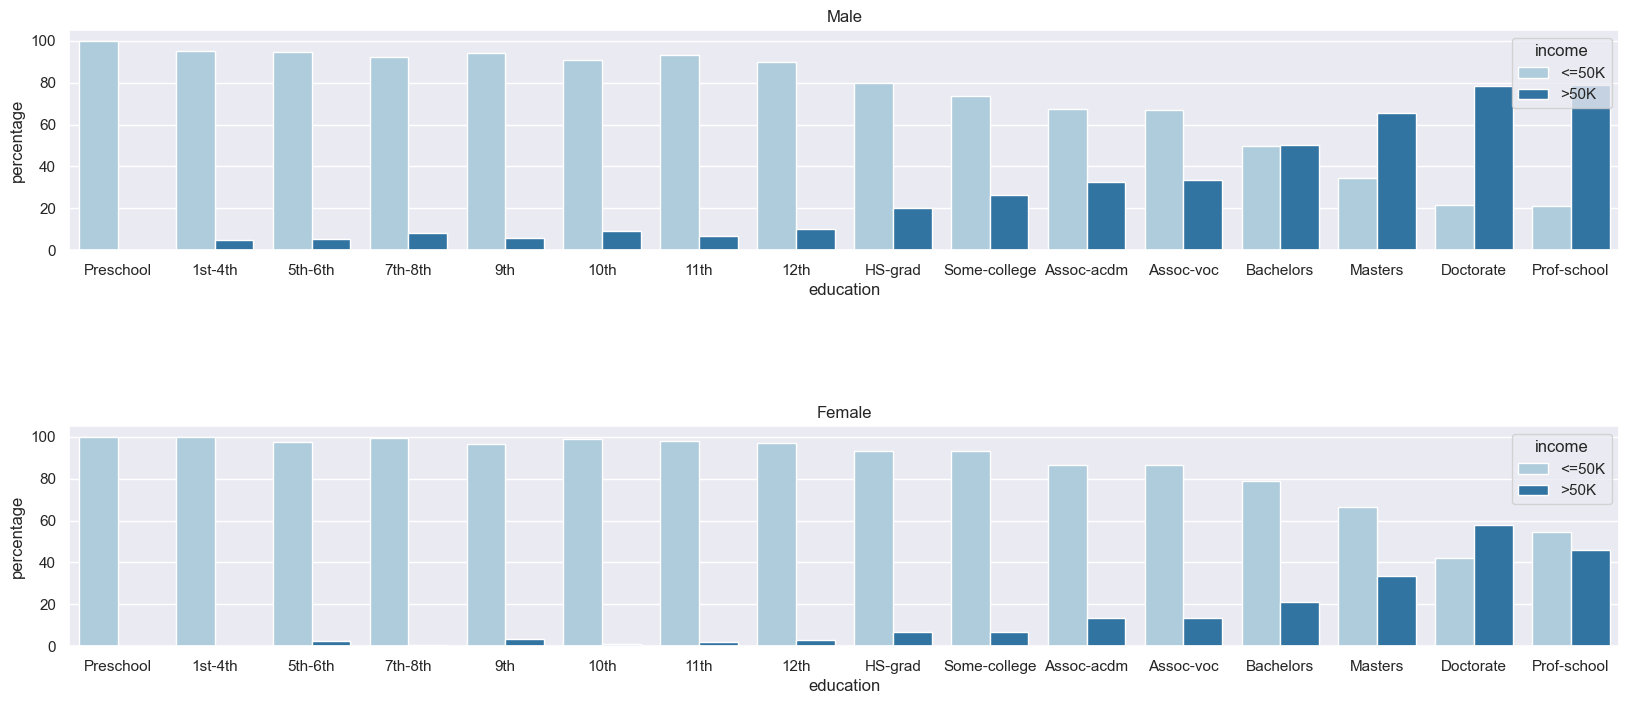

In [43]:
sns.set()
fig, axes = plt.subplots(2, 1,figsize=(20, 8))
fig.subplots_adjust(hspace=0.8, wspace=0.125)

sns.set_palette("Paired")
x, y, hue = "education", "percentage", "income"


educ_order = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 
                'HS-grad', 'Some-college', 'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Masters', 'Doctorate', 'Prof-school']

n=df[df["sex"]=="Male"]
(n[hue]
 .groupby(df[x])
 .value_counts(normalize=True)
 .mul(100).round(1)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue, order=educ_order,ax=axes[0])).set(title='Male')


n=df[df["sex"]=="Female"]
(n[hue]
 .groupby(df[x])
 .value_counts(normalize=True)
 .mul(100).round(1)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue, order=educ_order ,ax=axes[1])).set(title='Female')


### We can see that the majority of people from 30 to 55 are more likely to have  greater than 50K

Text(0.5, 1.0, 'Percentage income per age')

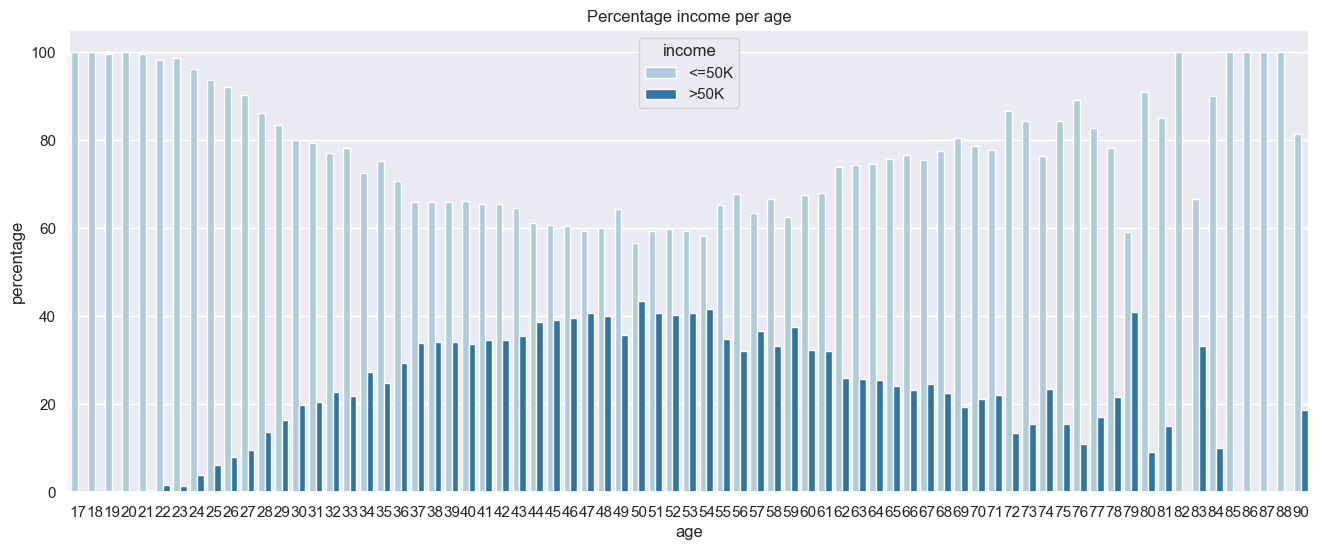

In [44]:
plt.figure(figsize=(16,6))
x, y, hue = "age", "percentage", "income"
(df[hue]
 .groupby(df[x])
 .value_counts(normalize=True)
 .mul(100).round(1).rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue)).set_title("Percentage income per age")

### Other relations between "relationship" and "marital_status"

+ It was interesting to see how people with marital status "Married CIV Spouse" have relationship as "Not in Family" that could mean they are seperated. 
+ It was interesting also to see how "Unmarried" and "Not in Family" share the same marital status. 

In [45]:
# unmarried is widowed, divorsed, separated, never-married, married spouse absent
df[df["relationship"]=="Unmarried"]["marital.status"].unique()

array(['Widowed', 'Divorced', 'Separated', 'Never-married',
       'Married-spouse-absent'], dtype=object)

In [46]:
df[df["relationship"]=="Not-in-family"]["marital.status"].unique()

array(['Widowed', 'Divorced', 'Never-married', 'Separated',
       'Married-civ-spouse', 'Married-spouse-absent'], dtype=object)

In [47]:
df[(df["relationship"]=="Not-in-family") & (df["marital.status"]=="Married-civ-spouse")].head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income,age_class,work_type,net_capital
26,33,Private,228696,1st-4th,2,Married-civ-spouse,Craft-repair,Not-in-family,White,Male,32,Mexico,<=50K,Middle-aged,Full_time,-2603
3739,18,Private,184016,HS-grad,9,Married-civ-spouse,Priv-house-serv,Not-in-family,White,Female,40,United-States,<=50K,Young,Full_time,3103
3802,56,State-gov,54260,Doctorate,16,Married-civ-spouse,Prof-specialty,Not-in-family,Asian-Pac-Islander,Male,40,China,<=50K,Senior,Full_time,2885
5246,25,Private,404616,Masters,14,Married-civ-spouse,Farming-fishing,Not-in-family,White,Male,99,United-States,>50K,Young,Workaholic,0
6393,31,Private,133770,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Not-in-family,Asian-Pac-Islander,Male,50,United-States,>50K,Middle-aged,OverTime,0


### Both Asian-Pasific-Islander and White people seem to make more than 50K within their race more so than other races.
+ The Asian-Pac-Islander and White race categories both around 25% make more than 50K, and around 74% make less than 50K.


<AxesSubplot:xlabel='race', ylabel='percentage'>

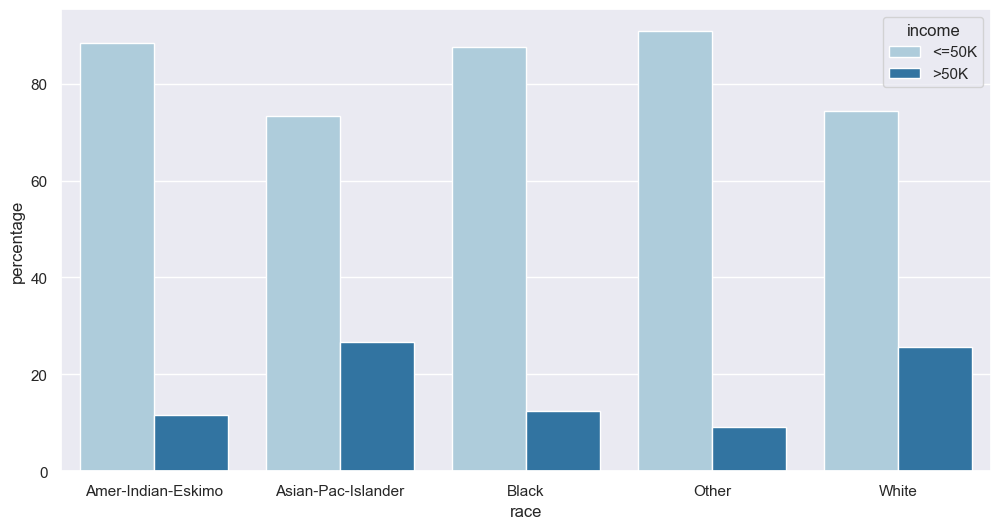

In [48]:
plt.figure(figsize=(12,6))
sns.set_palette("Paired")
x, y, hue = "race", "percentage", "income"

(df[hue]
 .groupby(df[x])
 .value_counts(normalize=True)
 .mul(100).round(1)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

### Relationships between Continuous Variables
+ We can see that if a person has around 46,000 or greater in net capital they make more then 50K.
+ Age for less than 50K is more skewed to right which makes sense because younger people tend to make less money.
+ Hour per week seems to be centered at 40 hours per week which makes sense because that is full time work week.

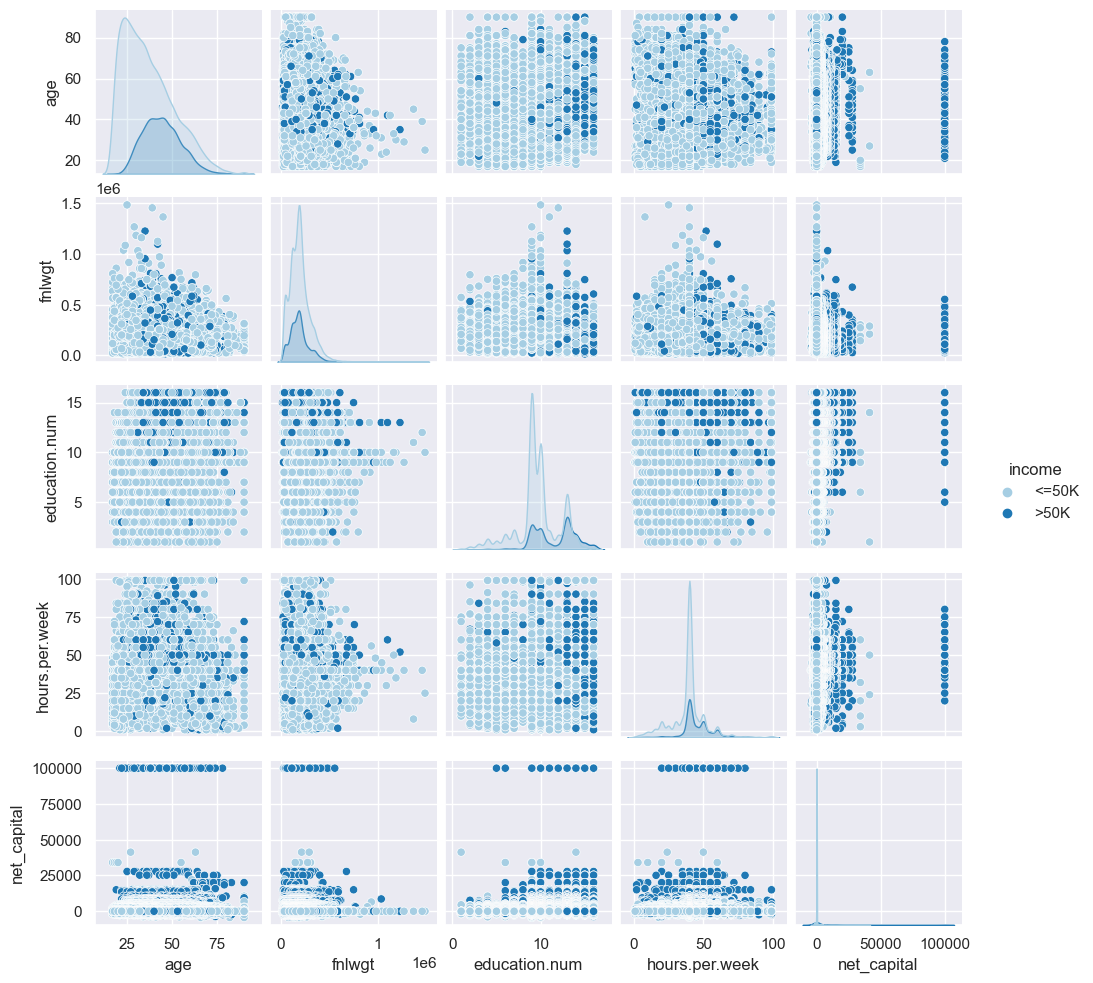

In [49]:
# Patterns we see with our response variable
sns.pairplot(df, hue="income", height=2)

### Correlation Plot
+ We do not see high correlation between any of our continuous variables. 
+ We see the highest correlation between education.num and hours per week with a value of 0.15. 

<AxesSubplot:>

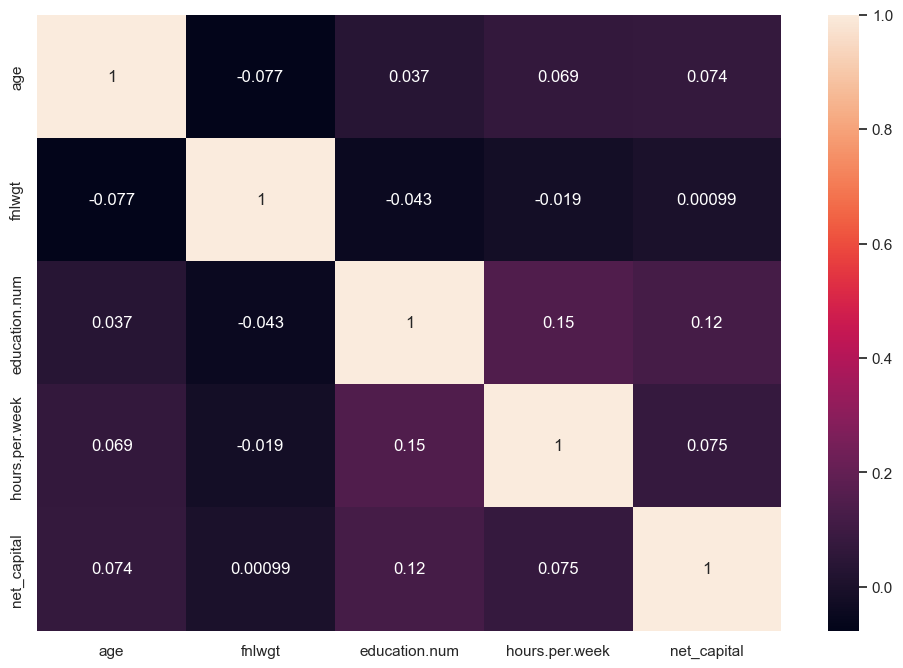

In [50]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)

# Extra statistical tests on above some of the above assumptions

In [51]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

## Age and Income Anova

+ We performed an Anova between Income and age to check if there was a statistical significance.
+ We found that there was enough evidence to suggest that mean age of people making  more than 50K is not equal to mean age of people making less than 50K (p-value < 0.001). 


In [52]:
# Checking columns names
df.columns 

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'hours.per.week', 'native.country', 'income', 'age_class', 'work_type',
       'net_capital'],
      dtype='object')

In [57]:
# Updating column names 
df.columns=['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'hours_per_week', 'native_country', 'income', 'age_class', 'work_type',
       'net_capital']


In [58]:
# Logging age due to the skewness
from sklearn.preprocessing import FunctionTransformer 
log_transformer = FunctionTransformer(np.log1p)
df["age"] = log_transformer.fit_transform(df[["age"]])

In [59]:
# Ordinary Least Squares (OLS) model
model = ols('age ~ C(income)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=3)
anova_table

,sum_sq,df,F,PR(>F)
Intercept,314250.528465,1.0,2.763912e+06,0.0
C(income),287.426317,1.0,2.527987e+03,0.0
Residual,3701.884222,32559.0,NaN,NaN


In [60]:
# Tukey
from bioinfokit.analys import stat
res = stat()
res.tukey_hsd(df=df, res_var='age', xfac_var='income', anova_model='age ~ C(sex)')
res.tukey_summary

/Users/lauraahumada/opt/anaconda3/envs/smuenv/lib/python3.7/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,<=50K,>50K,0.219736,0.210893,0.22858,68.871119,0.001


#### Checking assumptions for the Anova test
+ There is not enough evidence to suggest the residuals are not normally distributed based on the residuals plot and the qq plot. 

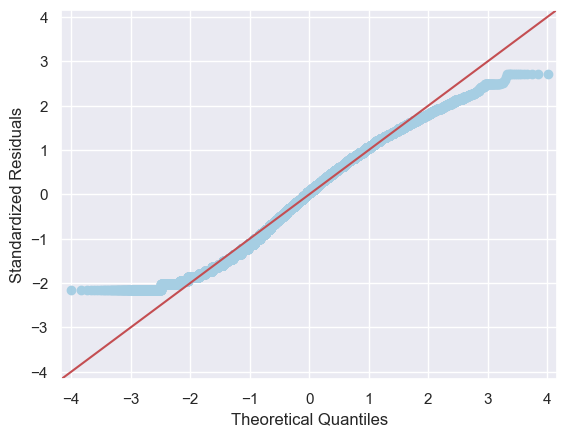

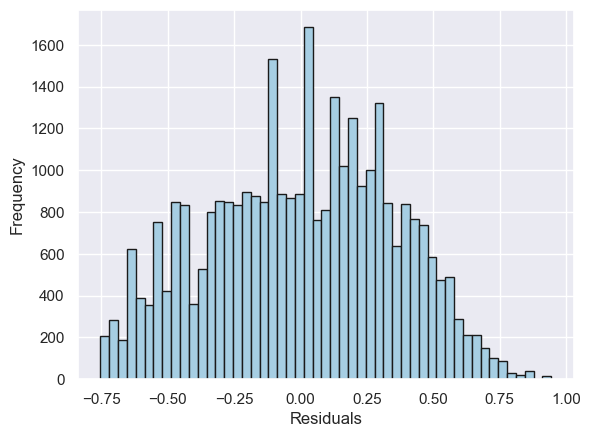

In [61]:
# QQ-plot
import statsmodels.api as sm
import matplotlib.pyplot as plt
# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

# Chi-squared test to check if there is a statistical difference between income and sex 
+ There is enough evidence to reject the null hypothesis of males and females having equal income (p_val=0.0000)
+ Based on evidence seen on the EDA we see this discrepancy where males have a higher income.

In [62]:
from scipy.stats import chi2_contingency
chisqt = pd.crosstab(df.sex, df.income, margins=True)

value = np.array([chisqt.iloc[0][0:5].values,
                  chisqt.iloc[1][0:5].values])
print(chi2_contingency(value)[0:3])

#p val o 0.0, Statistical val 1441.4918478416585, df=2

(1518.8868199570722, 0.0, 2)


# Chi-squared test to check if there is a statistical difference between income and race 
+ There is strong evidence to reject the null hypothesis that all races have an equal income (p_val=2.266882172058718e-07)

In [63]:
import scipy

In [64]:
chisqt = pd.crosstab(df.race, df.income, margins=True)

value = np.array([chisqt.iloc[0][0:5].values,
                  chisqt.iloc[1][0:5].values])
print(chi2_contingency(value)[0:3])


(30.260123182098532, 2.685948863903084e-07, 2)


# PCA
+ Finding relationships and dimensionality reduction
+ We do see a cluster on the top right corner grouping only greater than 50K. 
+ We do not see any people that make under 50k at PC1 > 5.
+ There is an overlap of people that make over and under 50k between PC1 = (-2,4)
+ At PC1 <= -2 we only see people that make under 50K.

In [65]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler

In [66]:

# now let's use PCA to find the two "best" dimensions of this data
# these are linear transforms to help project the features into something more understandable

features = ['age', 'fnlwgt', 'education_num', 'net_capital', 'hours_per_week']

# Separating out the features
x = df.loc[:, features].values
# Separating out the income
y = df.loc[:,['income']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
, columns = ['principal component 1', 'principal component 2'])


finalDfPCA = pd.concat([principalDf, df[['income']]], axis = 1)

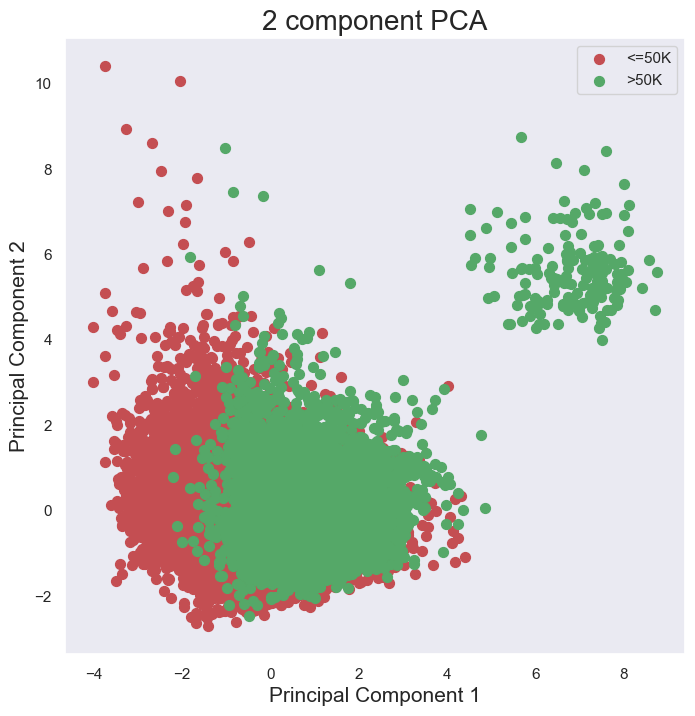

In [67]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['<=50K', '>50K']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDfPCA['income'] == target
    ax.scatter(finalDfPCA.loc[indicesToKeep, 'principal component 1']
               , finalDfPCA.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()